# 2.2.4 Challenge - Wine Characteristics

Link to database: http://archive.ics.uci.edu/ml/datasets/Wine 

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991

4. Relevant Information:

   -- These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 

   -- I think that the initial data set had around 30 variables, but 
      for some reason I only have the 13 dimensional version. 
      I had a list of what the 30 or so variables were, but a.) 
      I lost it, and b.), I would not know which 13 variables
      are included in the set.

   -- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline       

### Setting up workspace by importing relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading in file and setting columns equal to the characteristics above

In [113]:
df = pd.read_csv('wine_data.csv')
df.columns = ['Cultivar', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
              'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print(df)

     Cultivar  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0           1    13.20        1.78  2.14               11.2        100   
1           1    13.16        2.36  2.67               18.6        101   
2           1    14.37        1.95  2.50               16.8        113   
3           1    13.24        2.59  2.87               21.0        118   
4           1    14.20        1.76  2.45               15.2        112   
5           1    14.39        1.87  2.45               14.6         96   
6           1    14.06        2.15  2.61               17.6        121   
7           1    14.83        1.64  2.17               14.0         97   
8           1    13.86        1.35  2.27               16.0         98   
9           1    14.10        2.16  2.30               18.0        105   
10          1    14.12        1.48  2.32               16.8         95   
11          1    13.75        1.73  2.41               16.0         89   
12          1    14.75        1.73  2.

### Creation of Histogram and Boxplot to identify distribution

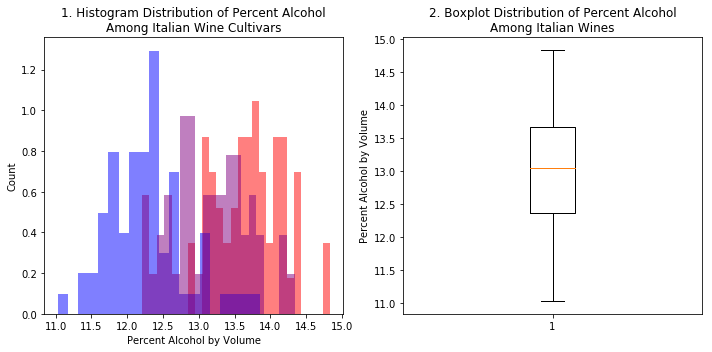

In [116]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df.loc[lambda df: df['Cultivar'] == 1, 'Alcohol'], bins=20, color='red', alpha=0.5, normed=True)
plt.hist(df.loc[lambda df: df['Cultivar'] == 2, 'Alcohol'], bins=20, color='blue', alpha=0.5, normed=True)
plt.hist(df.loc[lambda df: df['Cultivar'] == 3, 'Alcohol'], bins=20, color='purple', alpha=0.5, normed=True)
plt.title('1. Histogram Distribution of Percent Alcohol\nAmong Italian Wine Cultivars')
plt.xlabel('Percent Alcohol by Volume')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.boxplot(df['Alcohol'])
plt.title('2. Boxplot Distribution of Percent Alcohol\nAmong Italian Wines')
plt.ylabel('Percent Alcohol by Volume')

plt.tight_layout()
plt.show()

#### What Do We See 1
1. Histogram
    The histograms reveal that these Italian wines have a percent alcohol by volume of between 11% and 15% with most of the wines having a percent alcohol of between 11.5 and 14.5%.  The wines in Cultivar 1 have a higher distribution of percent alcohol, as represented by the red bins, whereas the wines in Cultivar 2 have the lowest percent alcohol, as represented by the blue bins.  
    
2. Box Plot
    The box plot provides us the inner quartlie range, including the median percent alcohol by volume for these wines.  The median percent alcohol of these wines was 13%, with the inner 50% of wines spanning between 12.3% and 13.7% alcohol by volume. There are no outliers in this data set.

### Creation of Relational Scatterplots

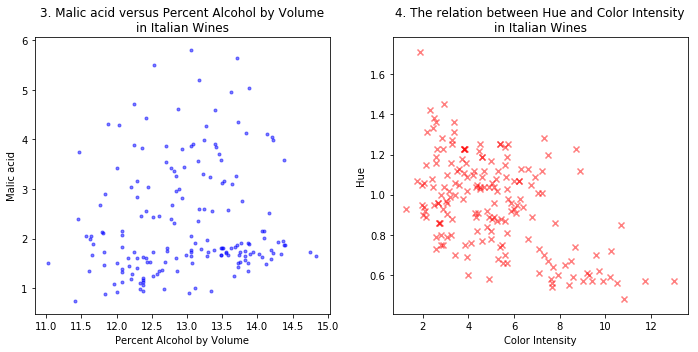

In [115]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(df['Alcohol'], df['Malic acid'], marker='.', color='blue', alpha=0.5)
plt.title('3. Malic acid versus Percent Alcohol by Volume\nin Italian Wines')
plt.xlabel('Percent Alcohol by Volume')
plt.ylabel('Malic acid')

plt.subplot(1, 2, 2)
plt.scatter(df['Color intensity'], df['Hue'], marker='x', color='red', alpha=0.5)
plt.title('4. The relation between Hue and Color Intensity\nin Italian Wines')
plt.xlabel('Color Intensity')
plt.ylabel('Hue')

plt.tight_layout()
plt.show()

#### What Do We See 2
3. Scatter Plot of Malic Acid vs Percent Alcohol
    This scatter plot reveals that there is little relation between the amount of malic acid in a wine and the percent alcohol in the wine.  In general, the majority of wines have less than 2 (unknown units) of malic acid, but are evenly distributed amongst the various percent alcohols.

4. Scatter Plot of Hue vs Color Intensity
    The hue of a wine tells us the color, whereas the color intensity tells us the depth of the color. Note: These values are measured by absorption spectroscopy.  In this set of wines from Italy, there is a negative correlation between hue and intensity, as this scatter plot reveals that the more intense the color, the lower the hue of the wine.  There are a couple of wines in this set that stand out, specifically in the middle hue and middle intensity, where they have both a higher hue and a higher intensity.

### Calculation of Percent Flavanoids and Scatterplot

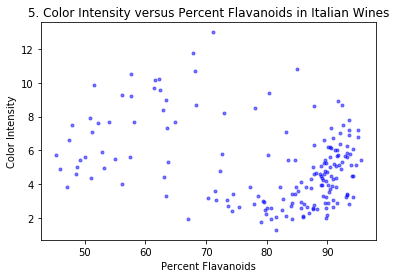

In [118]:
#creation of percent flavanoids category
df['Percent Flavanoids'] = df['Flavanoids']/(df['Flavanoids'] + df['Nonflavanoid phenols'])*100

plt.scatter(df['Percent Flavanoids'], (df['Color intensity']), marker='.', color='blue', alpha=0.5)
plt.title('5. Color Intensity versus Percent Flavanoids in Italian Wines')
plt.xlabel('Percent Flavanoids')
plt.ylabel('Color Intensity')
plt.show()

#### What Do We See 3
5. Scatterplot of Color Intensity vs Percent Flavanoids
    The percent flavanoids, as calculated by dividing the flavanoids by the sum of flavanoids and nonflavanoid phenols, multiplied by 100, is generally fairly high and above 80% in this set of wines.  The flavanoids are the compounds in wine that have antioxidant properties.  This scatterplot reveals that the wines with higher color intensity have a moderate percent flavanoid, whereas wines with color intensities in the range of 2-6 (units unknown) have the highest percent flavanoids of the sampled wines. 